# Usage & Examples

## Basic functionalities

### 1. Applying the style sheet: lizard_style()

The package includes **a built-in style sheet**, designed to standardize and enhance the visual appeal of your plots. This style sheet configures various elements, ranging from fonts and font sizes to axis and grid settings, and even the default colors for multiple lines in a plot. Applying this style, which is also possible in the R package with + lizard_style() provides a **consistent look**, whether you're using ggplot in R or matplotlib/seaborn in Python.

You can apply the Biolizard-look by placing `lizard_style()` at the top of your scripts after importing BioLizardStylePython. Please note that `lizard_style()` serves as a starting template and may not be the ideal style for every plot. You can easily customize individual style settings by placing your overrides after calling the `lizard_style()` function. Use `plt.style.use('default')` to return back to the default style.

Here's a demonstration of how a simple line plot would look before and after applying the `lizard_style()`:

Lato font found! Ready to start visualizing in BLZ style!


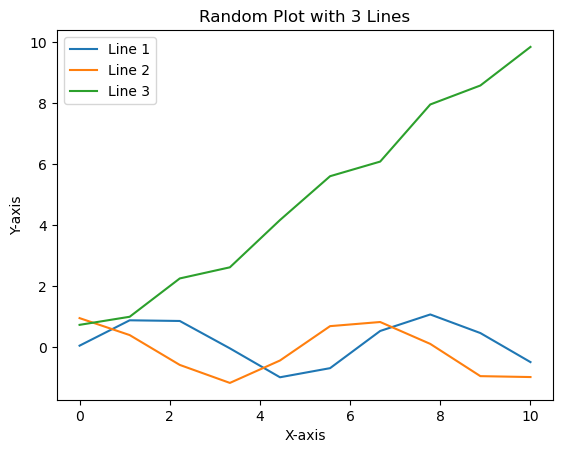

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BioLizardStylePython import *
np.random.seed(42)

# Function to create random lineplot
def create_line_plot():
    x = np.linspace(0, 10, 10)
    y1 = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)
    y2 = np.cos(x) + np.random.normal(0, 0.1, size=x.shape)
    y3 = x + np.random.normal(0, 0.5, size=x.shape)
    plt.figure()
    plt.plot(x, y1, label='Line 1')
    plt.plot(x, y2, label='Line 2')
    plt.plot(x, y3, label='Line 3')
    plt.title('Random Plot with 3 Lines')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

create_line_plot()

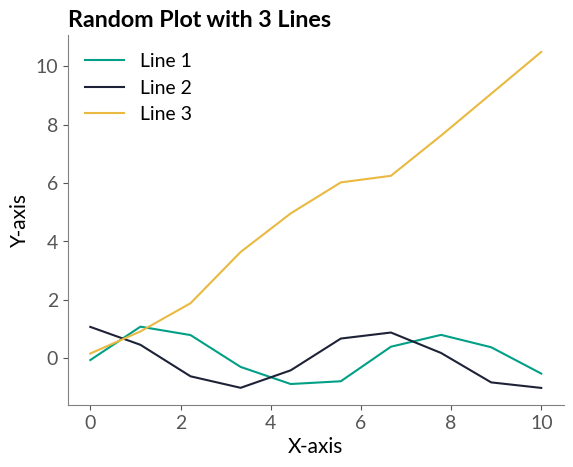

In [2]:
lizard_style()
create_line_plot()

### 2. Using the qualitative color palette

The `biolizard_qualitative_pal()` function **retrieves a predefined qualitative colormap**. For instance, `biolizard_qualitative_pal().colors` returns a list of all 12 colors in hex code. Calling `biolizard_qualitative_pal()(0)` fetches the first color in the palette, while `biolizard_qualitative_pal()(range(5))` retrieves the first five colors.

Here's two examples illustrating how to use this function:

/tmp/ipykernel_65467/3626689180.py:6: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette=biolizard_qualitative_pal().colors)


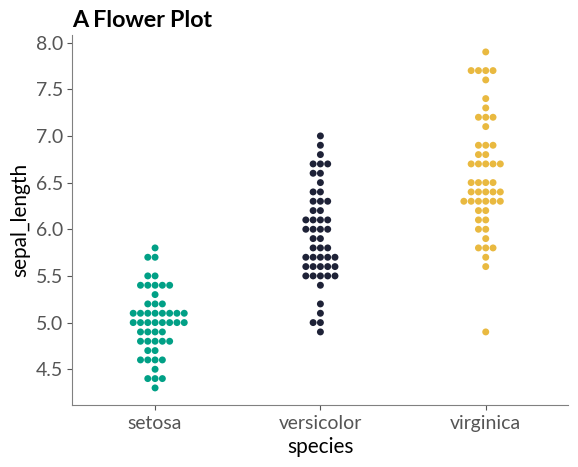

In [4]:
#Example 1
import seaborn as sns
# Sample data
data = sns.load_dataset("iris")
# Using the colormap in Seaborn's swarmplot
sns.swarmplot(x="species", y="sepal_length", hue ="species", data=data, palette=biolizard_qualitative_pal().colors)
plt.title('A Flower Plot')
plt.show()

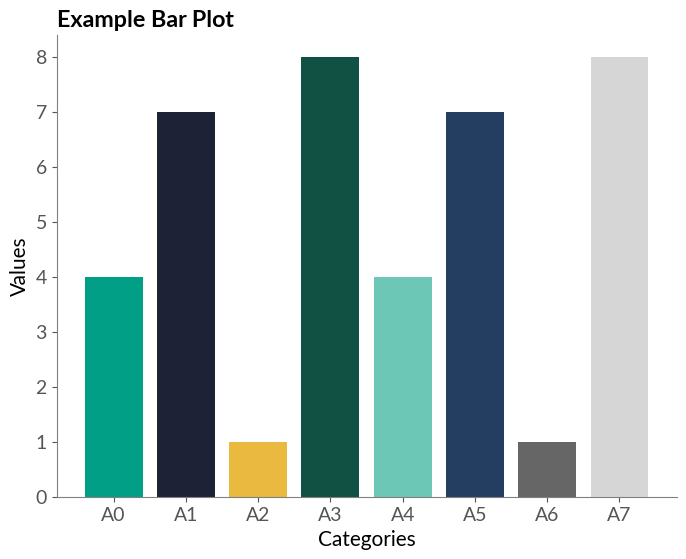

In [5]:
#Example 2
# Data for the bar plot
categories = ['A'+str(i) for i in range(8)]
values = [4, 7, 1, 8]*2

# Generate colors from the qualitative palette
palette= biolizard_qualitative_pal()
bar_colors = [palette(i) for i in range(len(categories))]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=bar_colors)

# Add title and labels
plt.title('Example Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

plt.show()

following the conventions of matplotlib, adding the suffix '_r' calls the reversed color palette. 

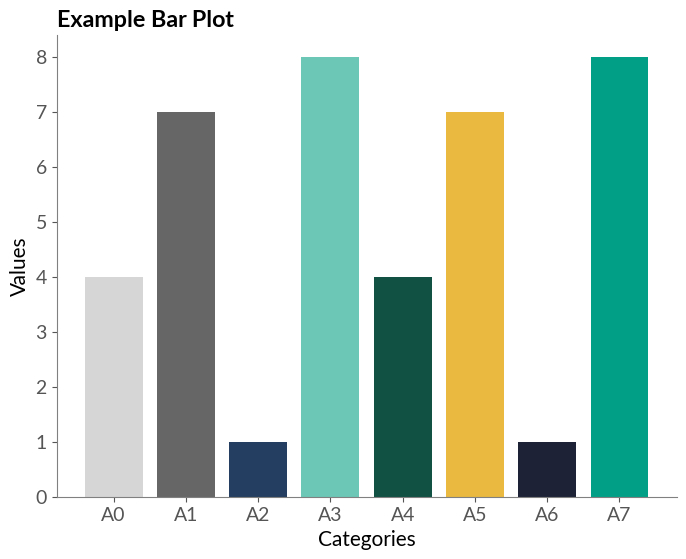

In [6]:
# Generate colors from the qualitative palette
palette= biolizard_qualitative_pal_r()
bar_colors = [palette(i) for i in range(len(categories))]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=bar_colors)

# Add title and labels
plt.title('Example Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

plt.show()

Note that you can also access the three base colors using:
- blz_green ("#01a086")
- blz_blue (#1e2237)
- blz_yellow (#e9b940)

### 3. Using the sequential & divergent color map

When you load this package, it automatically **registers two new colormaps in matplotlib**: a Sequential colormap and a Divergent colormap: **"biolizard_sequential_pal"** and **"biolizard_divergent_pal"**. Both **strings** are now recognized my matplotlib.

**Sequential**

The Sequential Biolizard Color Map is tailored to depict underlying numerical values via a uniform progression in luminance. It employs the distinctive **<span style="color:#01a086">BioLizard green</span>** as its base hue. The palette uses HCL gradients for better perceptual uniformity compared to RGB, and uses a triangular chroma progression to distinguish middle-range values from extremes.

**Divergent**

This colormap is specifically designed for scenarios where the color corresponds to numerical values that have a natural midpoint. It utilizes a triangular luminance sequence with differing hues in each "arm" of the palette. Chroma and luminance are balanced between the two arms, and the neutral central value has zero chroma. The palette employs hues **<span style="color:#A329E2">291</span>** and **<span style="color:#01a086">170</span>**, the latter being Biolizard's distinctive green. This hue combination ensures that the palette is accessible for all major forms of color blindness.

Here an example illustrating how to use these palettes:

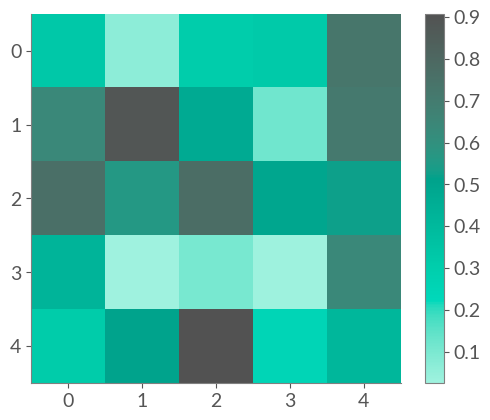

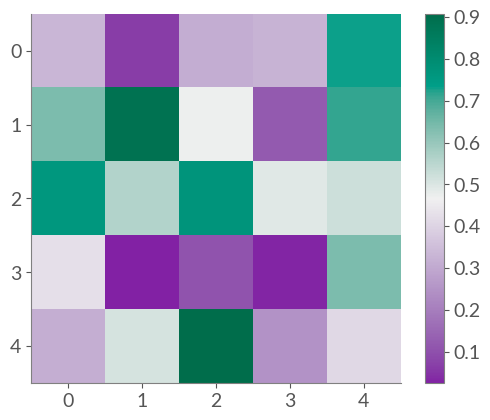

In [3]:
data = np.random.rand(5, 5)  # Example data
plt.imshow(data, cmap='biolizard_sequential_pal')
plt.colorbar()
plt.show()

plt.imshow(data, cmap='biolizard_divergent_pal')
plt.colorbar()
plt.show()

The corresponding palettes with suffix '_r' reverse the colors:

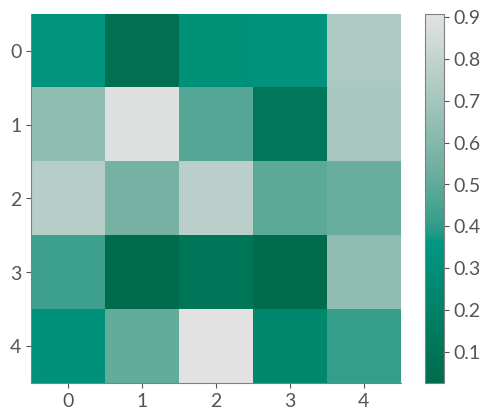

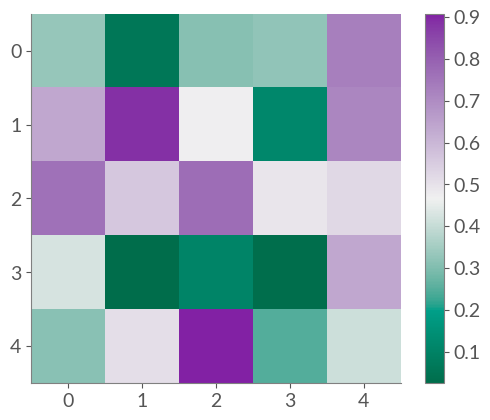

In [4]:
plt.imshow(data, cmap='biolizard_sequential_pal_r')
plt.colorbar()
plt.show()

plt.imshow(data, cmap='biolizard_divergent_pal_r')
plt.colorbar()
plt.show()

#### 4. Appending a BioLizard footer: finalise_lizardplot()

The `finalise_lizardplot` function finalizes a matplotlib plot by appending a footer at the bottom and saving the resulting image. The footer includes a BioLizard logo and a customizable source text.

**Parameters**

- `plot`: The input matplotlib figure to be finalized.
- `source_text`: The source text to display at the bottom.
- `fontsize`: (Optional) Font size of the source text. Defaults to 12.
- `pdf`: (Optional) If True, saves as PDF. Otherwise, saves as PNG. Defaults to False.
- `output_name`: (Optional) Name of the output file. Defaults to "TempLizardPlot".
- `save_filepath`: (Optional) Full path to save the output. Takes precedence over `output_name`.

Here's an example:


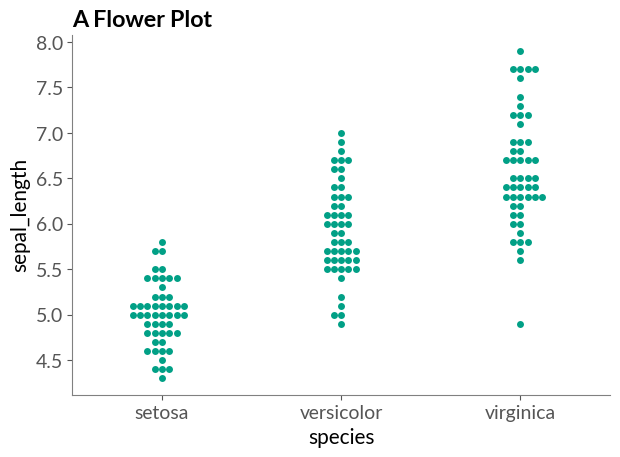

In [11]:
import seaborn as sns
data = sns.load_dataset("iris")
fig = plt.figure()
sns.swarmplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
finalise_lizardplot(fig,
                  'Source: https://en.wikipedia.org/wiki/Iris_flower_data_set ',
                  fontsize=10, pdf=True, output_name='An_Iris_Plot')

#Please take a look in your current working directory to see the result!

## Examples

### 1. simple boxplot

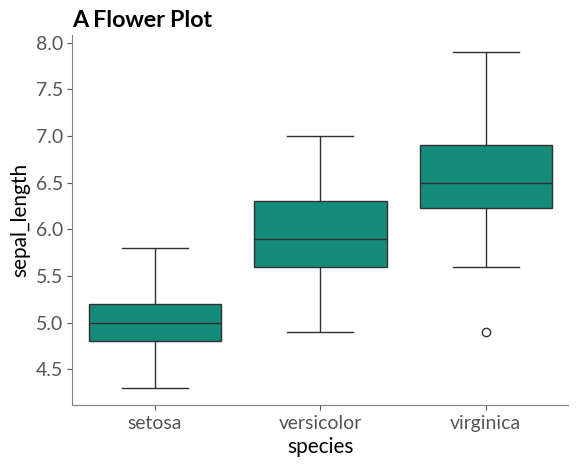

In [8]:
sns.boxplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
plt.show()

A violin plot is similar to a boxplot, but captures more information on the data distribution:

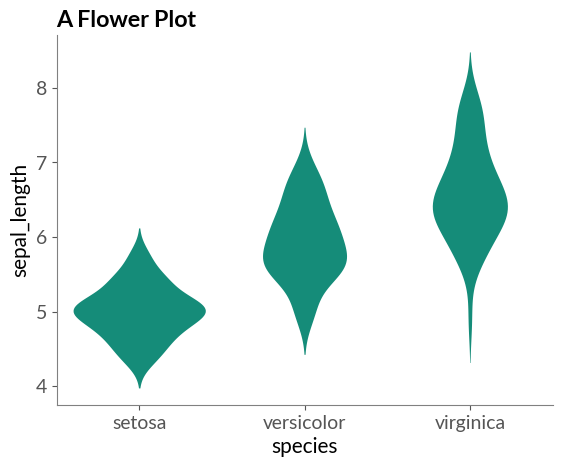

In [9]:
sns.violinplot(x="species", y="sepal_length", data=data)
plt.title('A Flower Plot')
plt.show()

### 2. Simple density plot

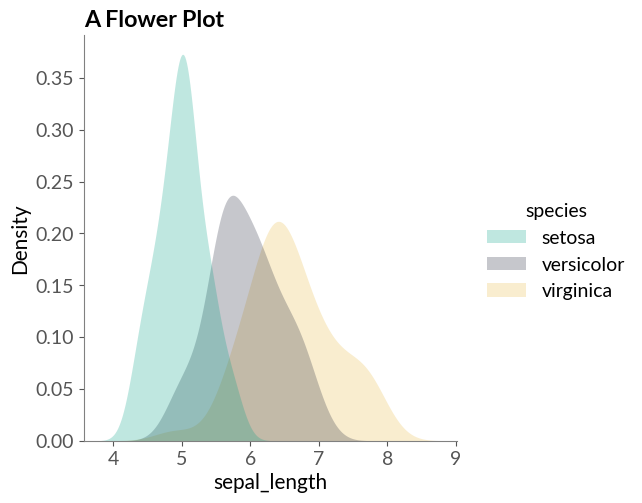

In [10]:
sns.displot(data, x="sepal_length", hue="species", kind="kde", fill=True)
plt.title('A Flower Plot')
plt.show()

### 3. Simple scatterplot

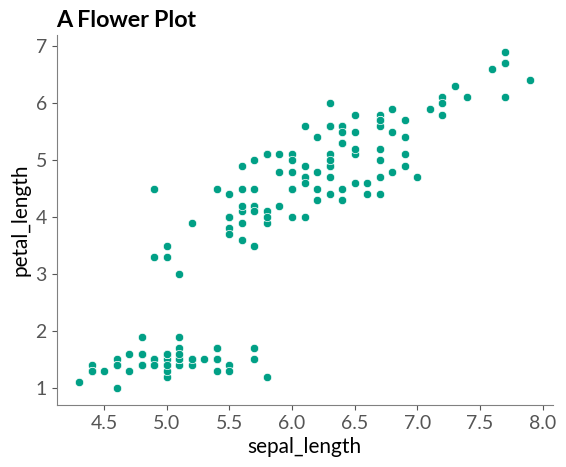

In [12]:
sns.scatterplot(data, x='sepal_length', y='petal_length')
plt.title('A Flower Plot')
plt.show()

We can use `lmplot` or `regplot` to add a regression line:

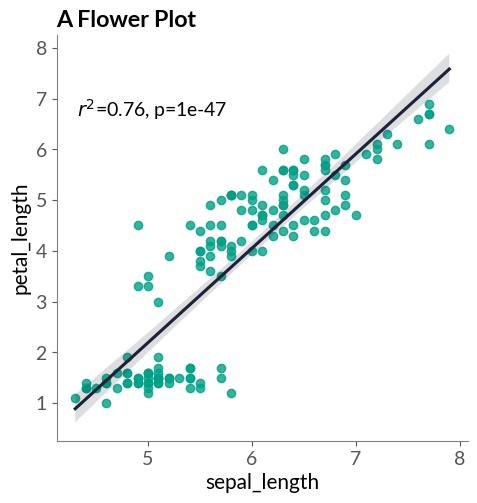

In [16]:
import scipy as sp

g = sns.lmplot(data, x='sepal_length', y='petal_length', line_kws=dict(color=blz_blue))

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['sepal_length'], data['petal_length'])
    ax = plt.gca()
    ax.text(.05, .8, '$r^2$={:.2f}, p={:.2g}'.format(r**2, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.title('A Flower Plot')
plt.show()

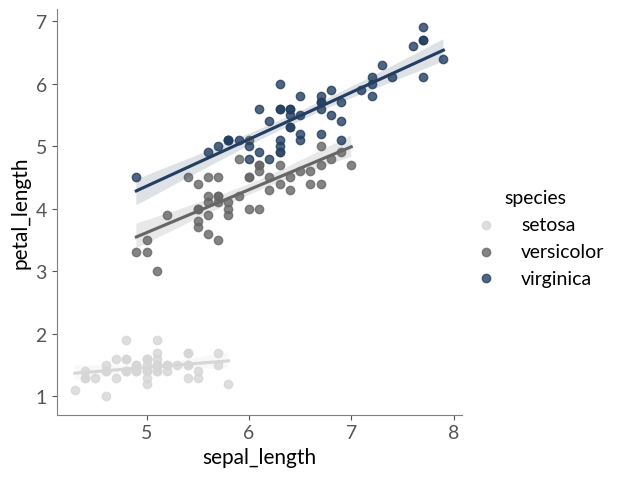

In [14]:
palette= biolizard_qualitative_pal_r()
my_colors = [palette(i) for i in range(3)]

# specify hue to show the three species
sns.lmplot(data, x='sepal_length', y='petal_length', hue='species',
           palette=my_colors)


Note that using the reversed palette starts picking the colors from the end of the palette. If you want to pick the colors you need, and reverse them afterward (eg yellow-blue-green instead of green-blue-yellow), use the regular palette and reverse the colors after picking them:

/tmp/ipykernel_65467/272072304.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


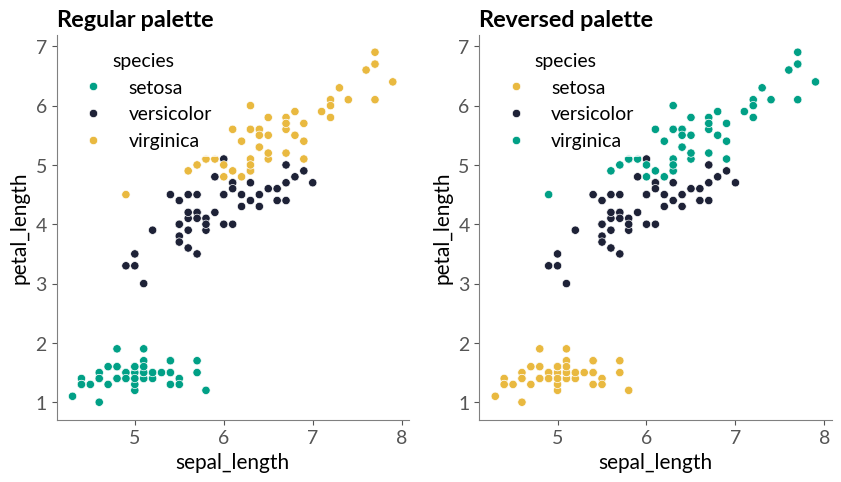

In [28]:
palette= biolizard_qualitative_pal()
my_colors = [palette(i) for i in range(3)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# regular palette
sns.scatterplot(data, x='sepal_length', y='petal_length', hue='species',
           palette=my_colors, ax=axes[0])
axes[0].set_title('Regular palette')

# reversed
my_colors.reverse()
sns.scatterplot(data, x='sepal_length', y='petal_length', hue='species',
           palette=my_colors, ax=axes[1])
axes[1].set_title('Reversed palette')

fig.show()


### 4. Facets

Facetting is a great way to lay out related plots side-by-side, with the axes either on the same scale or on different scales.

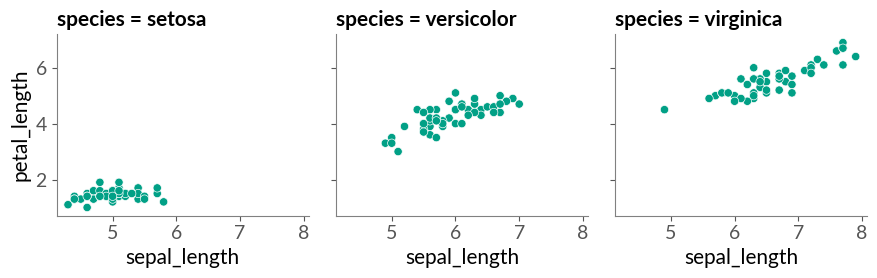

In [17]:
g = sns.FacetGrid(data, col="species")
g.map_dataframe(sns.scatterplot, x='sepal_length', y='petal_length')

### 5. Treemap plots

Treemap plots can be used as an alternative for bar charts, for example when there are so many categories that a bar chart mey not be clear anymore.

(0.0, 100.0, 0.0, 100.0)

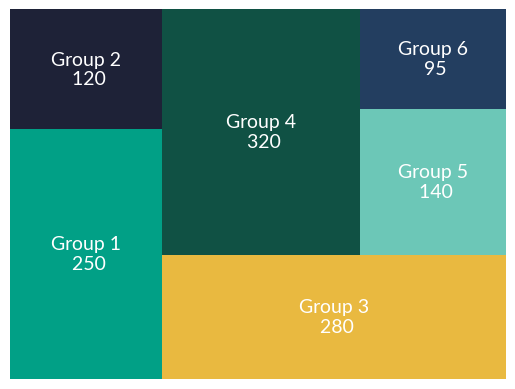

In [12]:
import squarify
import random


# Sample data
values = [250, 120, 280, 320, 140, 95]
labels = ['Group 1\n 250', 'Group 2\n 120', 'Group 3\n 280',
          'Group 4\n 320', 'Group 5\n 140', 'Group 6\n 95']
colors = biolizard_qualitative_pal()(range(len(labels)))

# Treemap
squarify.plot(sizes = values, label = labels, color = colors,
              text_kwargs={'color':'white'})

# Remove the axis:
plt.axis("off")

# plt.show()

### 6. Fun with maps

This example was taken from: https://matplotlib.org/basemap/stable/users/examples.html.

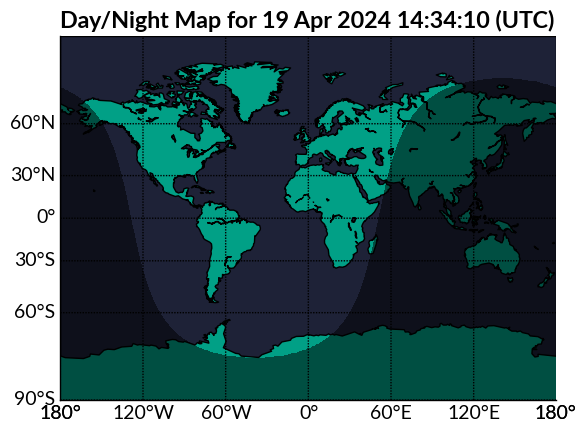

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

# miller projection 
map = Basemap(projection='mill',lon_0=0)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
map.drawmapboundary(fill_color=blz_blue)
map.fillcontinents(color=blz_green,lake_color=blz_blue)
# shade the night areas, with alpha transparency so the 
# map shows through. Use current time in UTC.
date = datetime.now()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()